In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/Machine Learning/SocialNetworkAds.csv')

In [2]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


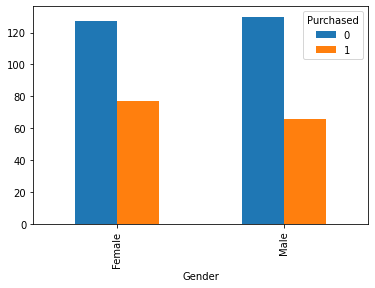

In [4]:
pd.crosstab(data.Gender,data.Purchased).plot(kind='bar')

In [5]:
subdata=data[['Gender','EstimatedSalary','Purchased']]
subdata.head()

,Gender,EstimatedSalary,Purchased
0,Male,19000,0
1,Male,20000,0
2,Female,43000,0
3,Female,57000,0
4,Male,76000,0


In [6]:
salary_dummies=pd.get_dummies(subdata.Gender,prefix='gender',prefix_sep=':')
data_with_dummies=pd.concat([subdata,salary_dummies],axis='columns')
x=data_with_dummies
x.head()

,Gender,EstimatedSalary,Purchased,gender:Female,gender:Male
0,Male,19000,0,0,1
1,Male,20000,0,0,1
2,Female,43000,0,1,0
3,Female,57000,0,1,0
4,Male,76000,0,0,1


In [7]:
x.drop('Gender',axis='columns',inplace=True)
x.head()

,EstimatedSalary,Purchased,gender:Female,gender:Male
0,19000,0,0,1
1,20000,0,0,1
2,43000,0,1,0
3,57000,0,1,0
4,76000,0,0,1


In [8]:
y=data.Purchased

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size=0.3)

In [10]:
from sklearn.linear_model import LogisticRegression as LR
model=LR()
model.fit(X_train,Y_train)

LogisticRegression()

In [11]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
model.score(X_test,Y_test)

0.6285714285714286